In [59]:
import pandas as pd

df=pd.read_csv("/content/drive/MyDrive/Admission_Predict.csv")

In [60]:
display(df.head())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Eksik değer kontrolü yapıyoruz

In [61]:
print(df.isnull().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


In [62]:
print(df.isna().sum())

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


Değeri null, 0 veya nan olan hiçbir veri yok

Hedef değişkeni 0 ve 1 olarak sınıflandıralım

In [63]:
# İkili sınıfa dönüştürme
df["Chance of Admit Binary"] = (df["Chance of Admit "] >= 0.75).astype(int)
display(df.head())

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admit Binary
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,1
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [64]:
# Hedef değişken ve bağımsız değişkenleri ayır

X = df.drop(columns=['Chance of Admit Binary'])
y = df['Chance of Admit Binary']


In [65]:
# train,test böl
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Veri kümelerinde, her özelliğin değeri farklı aralıklarda olabilir. Bu da bazı modellerin yanlı davranmasına neden olur. Ölçeklendirme ile tüm özellikleri aynı ölçek ve önem düzeyine getiririz.

In [66]:
from sklearn.preprocessing import StandardScaler

# Ölçeklendirme işlemi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [67]:
from sklearn.linear_model import LogisticRegression

# Modeli oluştur
model = LogisticRegression()

# Modeli eğit
model.fit(X_train_scaled, y_train)

# Test verisiyle tahmin yap
y_pred = model.predict(X_test_scaled)


Doğruluk (Accuracy): 0.975
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        47
           1       0.94      1.00      0.97        33

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



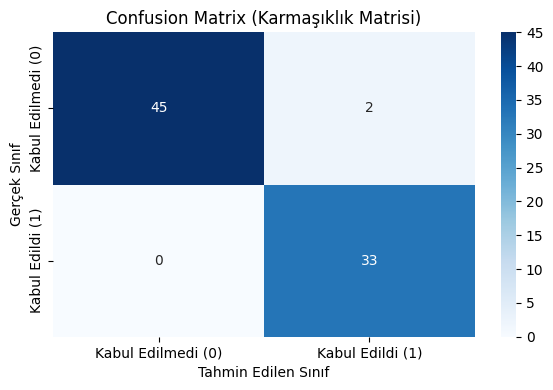

In [68]:
from sklearn.metrics import accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Doğruluk oranını hesapla
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk (Accuracy):", accuracy)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred)

# Etiketleri ayarla
labels = ['Kabul Edilmedi (0)', 'Kabul Edildi (1)']

# Heatmap ile görselleştir
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Karmaşıklık Matrisi)")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.tight_layout()
plt.show()


 **Accuracy**

Modelin doğruluğu %97.5 olarak hesaplanmış. Bu, modelin toplam tahminlerinin %97.5'inin doğru olduğunu gösterir.

 **Classification Report**
- *Precision*

Sınıf 0 için: 1.00 (yani model, sınıf 0 olarak tahmin ettiği örneklerin tamamı gerçekten sınıf 0)

Sınıf 1 için: 0.94 (model sınıf 1 dediğinde %94 doğru)
- *Recall*

Sınıf 0 için: 0.96 (gerçek sınıf 0 olanların %96'sı doğru tahmin edilmiş)

Sınıf 1 için: 1.00 (gerçek sınıf 1 olanların tamamı doğru tahmin edilmiş)

- *F1-Score*

Her iki sınıf için de yaklaşık 0.97-0.98, yani dengeli bir performans var.

**Confusion Matrix**

Gerçek 0, tahmin 0: 45 (True Negative)

Gerçek 0, tahmin 1: 2 (False Positive)

Gerçek 1, tahmin 0: 0 (False Negative)

Gerçek 1, tahmin 1: 33 (True Positive)

Bu matris gösteriyor ki:

Model, 0 sınıfını 45 kez doğru tahmin etmiş, 2 kez yanlışlıkla 1 olarak tahmin etmiş.

1 sınıfı için ise model tüm örnekleri doğru tahmin etmiş (0 yanlış).


- Model oldukça başarılı ve dengeli. Özellikle sınıf 1 için hatasız tahminler yapması önemli.


In [69]:
from sklearn.linear_model import SGDClassifier
import numpy as np

# SGDClassifier ile model oluştur (Stokastik Gradyan İnişi)
sgd_model = SGDClassifier(loss="log_loss", max_iter=1000, tol=1e-4, random_state=42, verbose=1)

# Modeli eğitim setinde eğit
sgd_model.fit(X_train_scaled, y_train.values.ravel())

# Eğitilen modelin ağırlıklarını ve bias değerini göster
print(f"\nSon Bias (b): {sgd_model.intercept_}")
print(f"Son Ağırlıklar (W): {sgd_model.coef_[:3]}")  # İlk 3 ağırlık


-- Epoch 1
Norm: 71.24, NNZs: 9, Bias: -7.262158, T: 320, Avg. loss: 1.540081
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 69.18, NNZs: 9, Bias: -8.764703, T: 640, Avg. loss: 0.445335
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 68.17, NNZs: 9, Bias: -4.482063, T: 960, Avg. loss: 0.387904
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 65.75, NNZs: 9, Bias: -9.153182, T: 1280, Avg. loss: 0.348296
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 60.56, NNZs: 9, Bias: -7.224291, T: 1600, Avg. loss: 0.275965
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 57.26, NNZs: 9, Bias: -8.030390, T: 1920, Avg. loss: 0.148195
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 53.49, NNZs: 9, Bias: -6.330831, T: 2240, Avg. loss: 0.075569
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 50.27, NNZs: 9, Bias: -6.157224, T: 2560, Avg. loss: 0.052238
Total training time: 0.01 seconds.
-- Epoch 9
Norm: 47.00, NNZs: 9, Bias: -7.748162, T: 2880, Avg. loss: 0.044568
Total traini

Model kısa sürede ve 25 epoch’ta kararlı şekilde yakınsıyor; ancak tek bir özelliğe aşırı bağımlılık (w₉) ve ölçek farklılıkları olası bir uyarı sinyali.

Çoğu ağırlık küçük mutlak değerlere sahipken, son özniteliğin ağırlığı 28.308 olarak dikkat çekiyor. Bu, son özniteliğin tahminlerde çok yüksek bir etkiye sahip olduğu anlamına gelir.

**Geliştirme Önerileri**

-Öğrenme oranını azaltıp tekrar denenebilir.

-Son özniteliğin ağırlığı diğerlerinden çok daha yüksek.L1 regularizasyonu (Lasso) gibi yöntemler denenebilir.


In [70]:
# Eşik değerini 80 yaparak denedim
df["Chance of Admit Binary"] = (df["Chance of Admit "] >= 0.80).astype(int)
display(df.head())

# Hedef değişken ve bağımsız değişkenleri ayır

X = df.drop(columns=['Chance of Admit Binary'])
y = df['Chance of Admit Binary']


# train,test böl
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler

# Ölçeklendirme işlemi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


from sklearn.linear_model import LogisticRegression

# Modeli oluştur
model = LogisticRegression()

# Modeli eğit
model.fit(X_train_scaled, y_train)

# Test verisiyle tahmin yap
y_pred = model.predict(X_test_scaled)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,Chance of Admit Binary
0,1,337,118,4,4.5,4.5,9.65,1,0.92,1
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0
3,4,322,110,3,3.5,2.5,8.67,1,0.80,1
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0


Doğruluk (Accuracy): 0.9875
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        51
           1       0.97      1.00      0.98        29

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



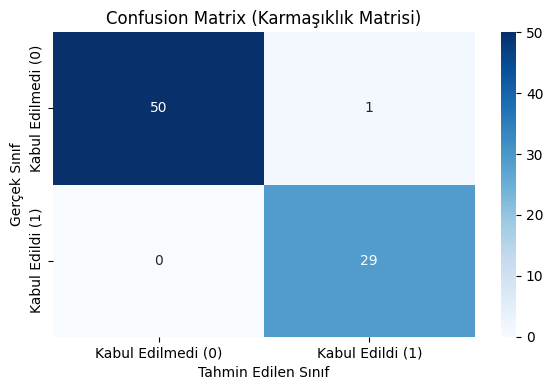

In [71]:
from sklearn.metrics import accuracy_score,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Doğruluk oranını hesapla
accuracy = accuracy_score(y_test, y_pred)
print("Doğruluk (Accuracy):", accuracy)

# Precision, Recall, F1-Score
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix hesapla
cm = confusion_matrix(y_test, y_pred)

# Etiketleri ayarla
labels = ['Kabul Edilmedi (0)', 'Kabul Edildi (1)']

# Heatmap ile görselleştir
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix (Karmaşıklık Matrisi)")
plt.xlabel("Tahmin Edilen Sınıf")
plt.ylabel("Gerçek Sınıf")
plt.tight_layout()
plt.show()


Lojistik Regresyon Model Karşılaştırması
             Method                                Best Params  Accuracy  \
0        Base Model                                    Default    0.8875   
1        GridSearch                {'C': 100, 'penalty': 'l1'}    0.9875   
2  RandomizedSearch  {'C': 5.987584841970366, 'penalty': 'l1'}    0.9750   

   ROC-AUC Score  
0       0.938034  
1       0.999288  
2       0.997863  

Base Model Confusion Matrix:
 [[50  4]
 [ 5 21]]

Base Model Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92        54
           1       0.84      0.81      0.82        26

    accuracy                           0.89        80
   macro avg       0.87      0.87      0.87        80
weighted avg       0.89      0.89      0.89        80


GridSearch Confusion Matrix:
 [[53  1]
 [ 0 26]]

GridSearch Classification Report:
               precision    recall  f1-score   support

           0       1.00 

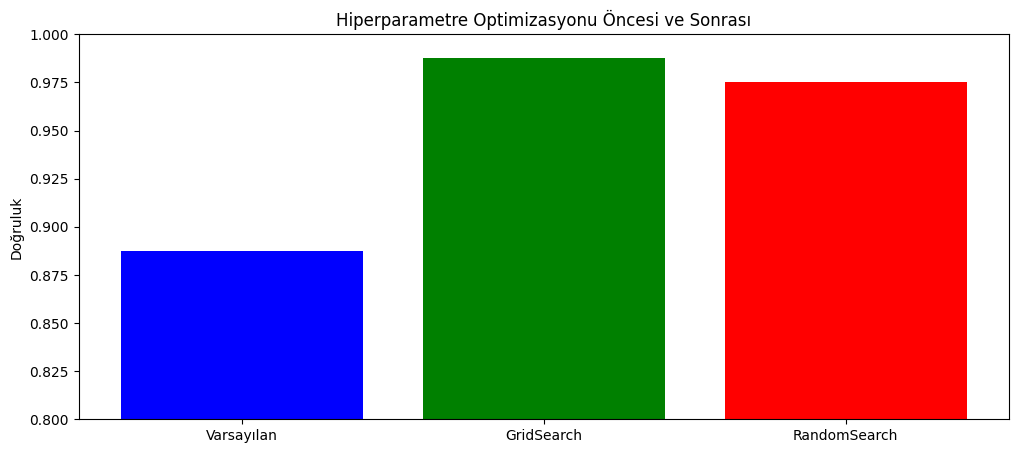

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from scipy.stats import uniform
import warnings
warnings.filterwarnings("ignore")


# Binary hedef değişken oluşturma
df["Chance of Admit Binary"] = (df["Chance of Admit "] >= 0.80).astype(int)

# Bağımsız ve bağımlı değişkenleri ayır
X = df.drop(columns=['Chance of Admit Binary'])
y = df['Chance of Admit Binary']

# Eğitim-test bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Değerlendirme fonksiyonu
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    return accuracy, roc_auc, confusion_matrix(y_test, y_pred), classification_report(y_test, y_pred)

# Varsayılan model
base_model = LogisticRegression(solver='liblinear')
base_model.fit(X_train, y_train)
base_accuracy, base_roc_auc, base_conf_matrix, base_class_report = evaluate_model(base_model, X_test, y_test)

# GridSearch parametreleri
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(base_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_grid_model = grid_search.best_estimator_
grid_accuracy, grid_roc_auc, grid_conf_matrix, grid_class_report = evaluate_model(best_grid_model, X_test, y_test)

# RandomizedSearch parametreleri
param_dist = {
    'C': uniform(0.001, 10),
    'penalty': ['l1', 'l2']
}
random_search = RandomizedSearchCV(base_model, param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)
best_random_model = random_search.best_estimator_
random_accuracy, random_roc_auc, random_conf_matrix, random_class_report = evaluate_model(best_random_model, X_test, y_test)

# Sonuç tablosu
results_df = pd.DataFrame({
    "Method": ["Base Model", "GridSearch", "RandomizedSearch"],
    "Best Params": ["Default", grid_search.best_params_, random_search.best_params_],
    "Accuracy": [base_accuracy, grid_accuracy, random_accuracy],
    "ROC-AUC Score": [base_roc_auc, grid_roc_auc, random_roc_auc]
})

# Yazdırma
print("Lojistik Regresyon Model Karşılaştırması")
print(results_df)

print("\nBase Model Confusion Matrix:\n", base_conf_matrix)
print("\nBase Model Classification Report:\n", base_class_report)

print("\nGridSearch Confusion Matrix:\n", grid_conf_matrix)
print("\nGridSearch Classification Report:\n", grid_class_report)

print("\nRandomizedSearch Confusion Matrix:\n", random_conf_matrix)
print("\nRandomizedSearch Classification Report:\n", random_class_report)

# Doğruluk karşılaştırma görselleştirmesi
plt.figure(figsize=(12, 5))
plt.bar(['Varsayılan', 'GridSearch', 'RandomSearch'],
        [base_accuracy, grid_accuracy, random_accuracy],
        color=['blue', 'green', 'red'])
plt.ylim(0.8, 1.0)
plt.ylabel('Doğruluk')
plt.title('Hiperparametre Optimizasyonu Öncesi ve Sonrası')
plt.show()


1. Hiperparametre Optimizasyonu Modelin Başarısını Artırdı mı?
Evet

Base Model: Accuracy = 0.89, F1-score (Sınıf 1) = 0.82

GridSearch: Accuracy = 0.99, F1-score (Sınıf 1) = 0.98

RandomizedSearch: Accuracy = 0.97, F1-score (Sınıf 1) = 0.96

Hiperparametre optimizasyonu (özellikle GridSearch) ile modelin hem genel doğruluğu hem de azınlık sınıfı (Sınıf 1) için performansı belirgin şekilde arttı. GridSearch, RandomizedSearch'e göre daha iyi sonuç verdi.

 2. Sınıf 0 ve Sınıf 1 arasında dengesizlik var mı?.
Sınıf 0 ve Sınıf 1 arasında dengesizlik var (54 vs 26 örnek), ancak model bu durumu iyi yönetti:

- Base Model:

Sınıf 1'de Recall = 0.81, Precision = 0.84 → Dengeli değil (False Negative yüksek).

- Optimize Modeller:

GridSearch: Sınıf 1'de Recall = 1.00, Precision = 0.96 → Mükemmel denge

RandomizedSearch: Sınıf 1'de Recall = 1.00, Precision = 0.93 → Hafif Precision düşüklüğü.


GridSearch, azınlık sınıfını neredeyse kusursuz tahmin ederek dengesizliği etkisiz hale getirdi.

3. Modeli İyileştirmek İçin Başka Yöntemler Gerekli mi?

Veri Artırma (SMOTE): Sınıf 1 örneklerini artırarak dengesizliği azaltmak için denenebilir.